In [12]:
import pandas as pd

data = pd.read_csv("/Users/yulia/Desktop/data_thesis/games_data.csv", header=None)
data.columns = ["user_ip", "model", "attempt_number", "word", "similarity", "current_time", "win", "test_number"]
data.head()

,user_ip,model,attempt_number,word,similarity,current_time,win,test_number
0,127.0.0.1,word2vec,0,food,0.212616,2024-05-13 20:43:54,False,test_1
1,127.0.0.1,word2vec,1,animal,0.101805,2024-05-13 20:44:00,False,test_1
2,127.0.0.1,word2vec,2,man,0.084017,2024-05-13 20:44:04,False,test_1
3,127.0.0.1,word2vec,3,apple,0.034246,2024-05-13 20:44:19,False,test_1
4,127.0.0.1,word2vec,4,meat,0.114032,2024-05-13 20:44:24,False,test_1


In [15]:
total_games = data[data['attempt_number'] == 0].groupby('model').size()

total_wins = data.groupby('model')['win'].sum()

win_percentage = (total_wins / total_games) * 100

results = pd.DataFrame({
    'total_games': total_games,
    'total_wins': total_wins,
    'win_percentage': win_percentage
})

results_sorted = results.sort_values(by='win_percentage', ascending=False)

print(results_sorted)

                                       total_games  total_wins  win_percentage
model                                                                         
FastText                                        10           5            50.0
Glove                                           10           5            50.0
SentenceTransformer(all-MiniLM-L6-v2)           10           5            50.0
OpenAI (text-embedding-3-small)                 10           3            30.0
word2vec                                        10           2            20.0


In [143]:
### Время потраченное в игре

In [16]:
import pandas as pd

data['current_time'] = pd.to_datetime(data['current_time'])

grouped_data = data.groupby(['model', 'test_number'])

time_diffs = grouped_data['current_time'].apply(lambda x: (x.max() - x.min()).total_seconds())

time_diffs_df = time_diffs.reset_index()

print(time_diffs_df)


                                    model test_number  current_time
0                                FastText     test_12           9.0
1                                FastText     test_21         714.0
2                                FastText     test_26          16.0
3                                FastText     test_34         704.0
4                                FastText     test_38         550.0
5                                FastText     test_42         450.0
6                                FastText     test_47         552.0
7                                FastText     test_49         258.0
8                                FastText      test_5         186.0
9                                FastText      test_7          69.0
10                                  Glove     test_15         331.0
11                                  Glove     test_22         549.0
12                                  Glove     test_27          49.0
13                                  Glove     te

In [83]:
import pandas as pd

data['current_time'] = pd.to_datetime(data['current_time'])

grouped_data = data.groupby(['model', 'test_number'])

win_games = grouped_data.filter(lambda x: any(x['win']))

grouped_win_games = win_games.groupby(['model', 'test_number'])

time_diffs_per_test = grouped_win_games['current_time'].apply(lambda x: (x.max() - x.min()).total_seconds())

time_diffs_per_test_df = time_diffs_per_test.reset_index()
time_diffs_per_test_df.rename(columns={'current_time': 'time_difference_seconds'}, inplace=True)

print(time_diffs_per_test_df)


                                    model test_number  time_difference_seconds
0                                FastText     test_12                      9.0
1                                FastText     test_26                     16.0
2                                FastText     test_49                    258.0
3                                FastText      test_5                    186.0
4                                FastText      test_7                     69.0
5                                   Glove     test_27                     49.0
6                                   Glove     test_35                    347.0
7                                   Glove     test_39                     78.0
8                                   Glove     test_43                    508.0
9                                   Glove      test_8                    111.0
10        OpenAI (text-embedding-3-small)     test_16                    256.0
11        OpenAI (text-embedding-3-small)      test_

In [84]:
grouped_model = time_diffs_df.groupby('model')

mean_std = grouped_model['current_time'].agg(['mean', 'std'])

mean_std_sorted = mean_std.sort_values(by='mean', ascending=False)

print(mean_std_sorted)


                                             mean         std
model                                                        
OpenAI (text-embedding-3-small)        422.600000  120.068684
SentenceTransformer(all-MiniLM-L6-v2)  360.500000  235.341006
FastText                               350.800000  277.041433
word2vec                               333.555556  188.668433
Glove                                  332.900000  211.211032


In [56]:
grouped_by_model = time_diffs_per_test_df.groupby('model')

mean_time_diffs_per_model = grouped_by_model['time_difference_seconds'].mean()

print(mean_time_diffs_per_model)
std_time_diffs_per_model = grouped_by_model['time_difference_seconds'].std()

print(std_time_diffs_per_model)



model
Glove                  218.600000
SentenceTransformer    250.800000
fast_tex               107.600000
gpt                    412.333333
word2vec               156.000000
Name: time_difference_seconds, dtype: float64
model
Glove                  200.218131
SentenceTransformer    241.008714
fast_tex               109.964994
gpt                    157.512962
word2vec               123.036580
Name: time_difference_seconds, dtype: float64


In [57]:
import pandas as pd

mean_std_sorted_df = pd.DataFrame(mean_std_sorted)
mean_std_sorted_df.columns = ['mean_time_all_game', 'std_time_all_games']


mean_time_diffs_per_model_df = pd.DataFrame(mean_time_diffs_per_model)
mean_time_diffs_per_model_df.columns = ['mean_time_win_games']

std_time_diffs_per_model_df = pd.DataFrame(std_time_diffs_per_model)
std_time_diffs_per_model_df.columns = ['std_time_win_games']

combined_df = pd.concat([mean_std_sorted_df, mean_time_diffs_per_model_df, std_time_diffs_per_model_df], axis=1)

combined_df_sorted = combined_df.sort_values(by='mean_time_win_games', ascending=True)

combined_df_sorted


,mean_time_all_game,std_time_all_games,mean_time_win_games,std_time_win_games
model,,,,
fast_tex,350.800000,277.041433,107.600000,109.964994
word2vec,333.555556,188.668433,156.000000,123.036580
Glove,332.900000,211.211032,218.600000,200.218131
SentenceTransformer,360.500000,235.341006,250.800000,241.008714
gpt,422.600000,120.068684,412.333333,157.512962


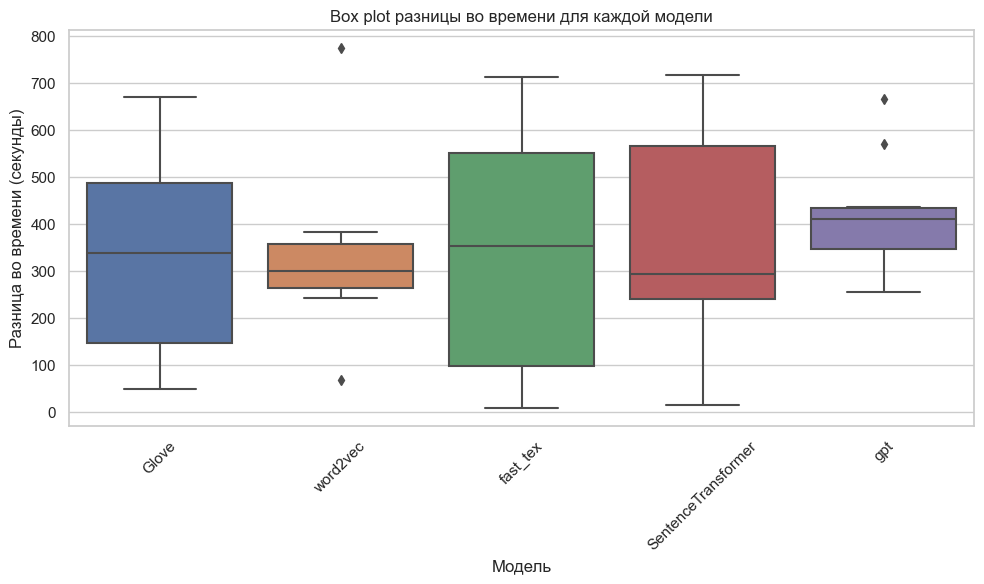

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

time_diffs_df_sorted = time_diffs_df.groupby('model')['current_time'].mean().sort_values().index


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='current_time', data=time_diffs_df, order=time_diffs_df_sorted)
plt.title('Box plot разницы во времени для каждой модели')
plt.xlabel('Модель')
plt.ylabel('Разница во времени (секунды)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


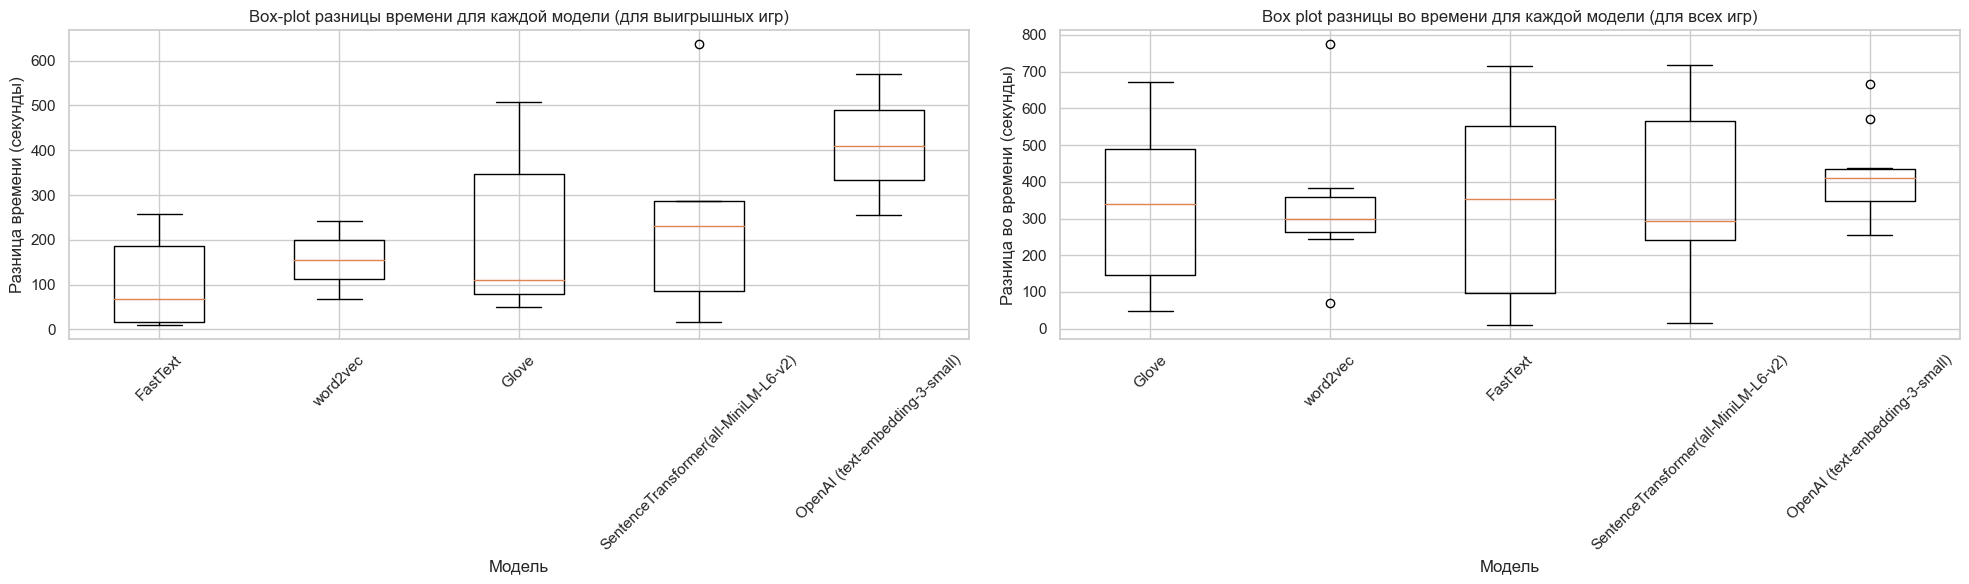

In [85]:
import matplotlib.pyplot as plt

grouped_by_model = time_diffs_per_test_df.groupby('model')

mean_time_diffs_per_model = grouped_by_model['time_difference_seconds'].mean()

mean_time_diffs_per_model_sorted = mean_time_diffs_per_model.sort_values(ascending=True)

data1 = []

for model_name in mean_time_diffs_per_model_sorted.index:
    data1.append(grouped_by_model.get_group(model_name)['time_difference_seconds'])


time_diffs_df_sorted = time_diffs_df.groupby('model')['current_time'].mean().sort_values().index


data2 = []


for model_name in time_diffs_df_sorted:
    data2.append(time_diffs_df[time_diffs_df['model'] == model_name]['current_time'])

и
plt.figure(figsize=(20, 6)) 
plt.subplot(1, 2, 1)  
plt.boxplot(data1, labels=mean_time_diffs_per_model_sorted.index)
plt.title('Box-plot разницы времени для каждой модели (для выигрышных игр)')
plt.xlabel('Модель')
plt.ylabel('Разница времени (секунды)')
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2) 
plt.boxplot(data2, labels=time_diffs_df_sorted)
plt.title('Box plot разницы во времени для каждой модели (для всех игр)')
plt.xlabel('Модель')
plt.ylabel('Разница во времени (секунды)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
### Среднее кол-во попыток

In [60]:
data.head()

,user_ip,model,attempt_number,word,similarity,current_time,win,test_number,secter
0,127.0.0.1,word2vec,0,food,0.212616,2024-05-13 20:43:54,False,test_1,NaN
1,127.0.0.1,word2vec,1,animal,0.101805,2024-05-13 20:44:00,False,test_1,NaN
2,127.0.0.1,word2vec,2,man,0.084017,2024-05-13 20:44:04,False,test_1,NaN
3,127.0.0.1,word2vec,3,apple,0.034246,2024-05-13 20:44:19,False,test_1,NaN
4,127.0.0.1,word2vec,4,meat,0.114032,2024-05-13 20:44:24,False,test_1,NaN


In [61]:
import pandas as pd


grouped_attempts = data.groupby('model')
mean_attempts = grouped_attempts['attempt_number'].mean()


std_attempts = grouped_attempts['attempt_number'].std()
attempts_stats = pd.DataFrame({'mean_attempts': mean_attempts, 'std_attempts': std_attempts})
attempts_stats_sorted = attempts_stats.sort_values(by='mean_attempts', ascending=False)

print(attempts_stats_sorted)


                     mean_attempts  std_attempts
model                                           
gpt                      19.010336     11.638995
word2vec                 18.806854     11.892753
SentenceTransformer      18.076687     11.721523
Glove                    18.075758     11.853091
fast_tex                 17.431734     11.933223


In [75]:
import pandas as pd

grouped_attempts = data.groupby('model')

mean_attempts = grouped_attempts['attempt_number'].mean()
std_attempts = grouped_attempts['attempt_number'].std()

attempts_stats = pd.DataFrame({
    'mean_attempts': mean_attempts,
    'std_attempts': std_attempts
})


additional_stats = []


for model in data['model'].unique():
    model_data = data[data['model'] == model]

    games = model_data.groupby('test_number')
    win_games = games.filter(lambda x: any(x['win']))

 
    mean_attempts_filtered = win_games['attempt_number'].mean()
    std_attempts_filtered = win_games['attempt_number'].std()
    
    additional_stats.append({
        'model': model,
        'mean_attempts_(win games)': mean_attempts_filtered,
        'std_attempts_(win games)': std_attempts_filtered
    })


additional_stats_df = pd.DataFrame(additional_stats)

merged_stats = attempts_stats.merge(additional_stats_df, on='model', how='left')

merged_stats.rename(columns={
    'mean_attempts_(win games)': 'mean_attempts_win_games',
    'std_attempts_(win games)': 'std_attempts_win_games'
}, inplace=True)

merged_stats_sorted = merged_stats.sort_values(by='mean_attempts')

merged_stats_sorted


,model,mean_attempts,std_attempts,mean_attempts_win_games,std_attempts_win_games
2,fast_tex,17.431734,11.933223,8.969231,7.055515
0,Glove,18.075758,11.853091,14.920000,11.187262
1,SentenceTransformer,18.076687,11.721523,14.818182,10.766460
4,word2vec,18.806854,11.892753,8.735294,6.086791
3,gpt,19.010336,11.638995,16.428571,10.488088


In [79]:
import pandas as pd


grouped_attempts = data.groupby('model')


mean_attempts = grouped_attempts['attempt_number'].mean()
std_attempts = grouped_attempts['attempt_number'].std()


attempts_stats = pd.DataFrame({
    'mean_attempts': mean_attempts,
    'std_attempts': std_attempts
})


additional_stats = []


for model in data['model'].unique():

    model_data = data[data['model'] == model]

    games = model_data.groupby('test_number')

    win_games = games.filter(lambda x: any(x['win']))

    mean_attempts_filtered = win_games['attempt_number'].mean()

    std_attempts_filtered = win_games['attempt_number'].std()
    
    additional_stats.append({
        'model': model,
        'mean_attempts_(win games)': mean_attempts_filtered,
        'std_attempts_(win games)': std_attempts_filtered
    })


additional_stats_df = pd.DataFrame(additional_stats)

merged_stats = attempts_stats.merge(additional_stats_df, on='model', how='left')

merged_stats.rename(columns={
    'mean_attempts_(win games)': 'mean_attempts_win_games',
    'std_attempts_(win games)': 'std_attempts_win_games'
}, inplace=True)

merged_stats_sorted = merged_stats.sort_values(by='mean_attempts')

mean_attempts_win_games_sorted = merged_stats_sorted[['model', 'mean_attempts_win_games']].sort_values(by='mean_attempts_win_games')

mean_attempts_win_games_sorted


,model,mean_attempts_win_games
4,word2vec,8.735294
2,fast_tex,8.969231
1,SentenceTransformer,14.818182
0,Glove,14.920000
3,gpt,16.428571


In [63]:
import pandas as pd

grouped_attempts = data.groupby('model')

mean_attempts = grouped_attempts['attempt_number'].mean()
std_attempts = grouped_attempts['attempt_number'].std()

attempts_stats = pd.DataFrame({
    'model': mean_attempts.index,
    'mean_attempts': mean_attempts.values,
    'std_attempts': std_attempts.values
})

additional_stats = []

for model in data['model'].unique():
    model_data = data[data['model'] == model]

    games = model_data.groupby('test_number')

    win_games = games.filter(lambda x: any(x['win']))

    mean_attempts_filtered = win_games['attempt_number'].mean()
    
    std_attempts_filtered = win_games['attempt_number'].std()
    
    additional_stats.append({
        'model': model,
        'mean_attempts_win_games': mean_attempts_filtered,
        'std_attempts_win_games': std_attempts_filtered
    })

additional_stats_df = pd.DataFrame(additional_stats)

merged_stats = attempts_stats.merge(additional_stats_df, on='model', how='left')

merged_stats = merged_stats[['model', 'mean_attempts', 'mean_attempts_win_games', 'std_attempts', 'std_attempts_win_games']]

merged_stats_sorted = merged_stats.sort_values(by='mean_attempts')

merged_stats_sorted


,model,mean_attempts,mean_attempts_win_games,std_attempts,std_attempts_win_games
2,fast_tex,17.431734,8.969231,11.933223,7.055515
0,Glove,18.075758,14.920000,11.853091,11.187262
1,SentenceTransformer,18.076687,14.818182,11.721523,10.766460
4,word2vec,18.806854,8.735294,11.892753,6.086791
3,gpt,19.010336,16.428571,11.638995,10.488088


In [144]:
### Similiarity vs Attempt 

### Maximum Similarity per attampt (Win games)

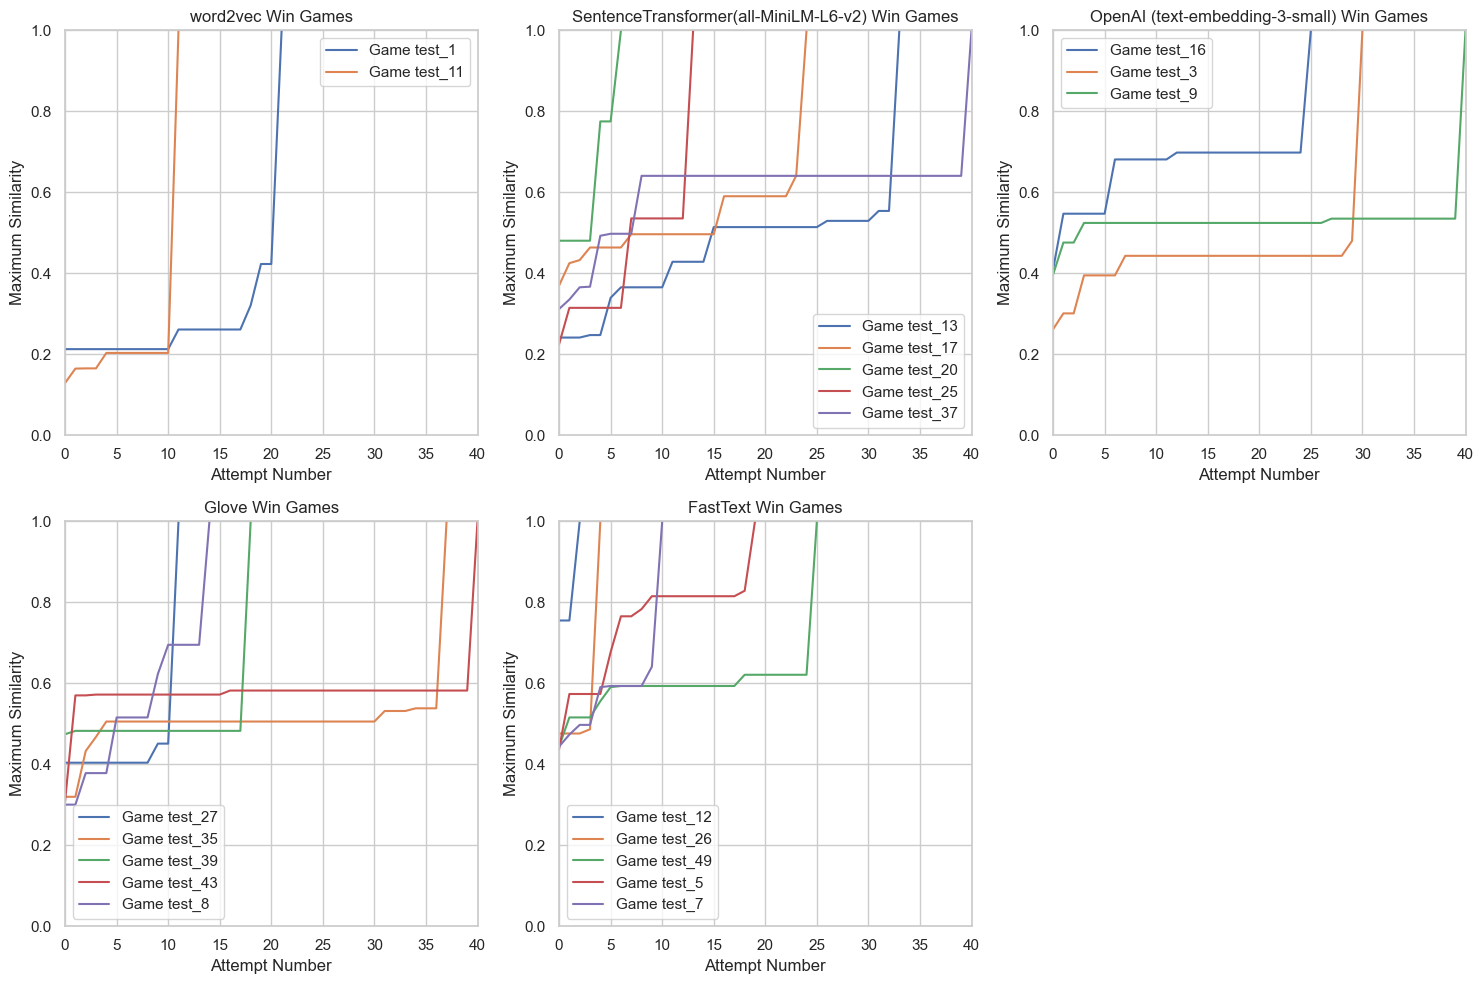

In [87]:
import matplotlib.pyplot as plt

unique_models = data['model'].unique()
num_rows = 2
num_cols = 3

plt.figure(figsize=(15, 10))

for i, model in enumerate(unique_models, 1):
    model_data = data[data['model'] == model]
    games = model_data.groupby('test_number')
    win_games = games.filter(lambda x: any(x['win']))
    plt.subplot(num_rows, num_cols, i)
    
    for name, group in win_games.groupby('test_number'):
        group['max_similarity'] = group['similarity'].cummax()
        plt.plot(group['attempt_number'], group['max_similarity'], label=f'Game {name}')
    
    plt.xlim(0, 40)
    plt.ylim(0, 1)
    plt.xlabel('Attempt Number')
    plt.ylabel('Maximum Similarity')
    plt.title(f'{model} Win Games')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Для не выигрышных попыток

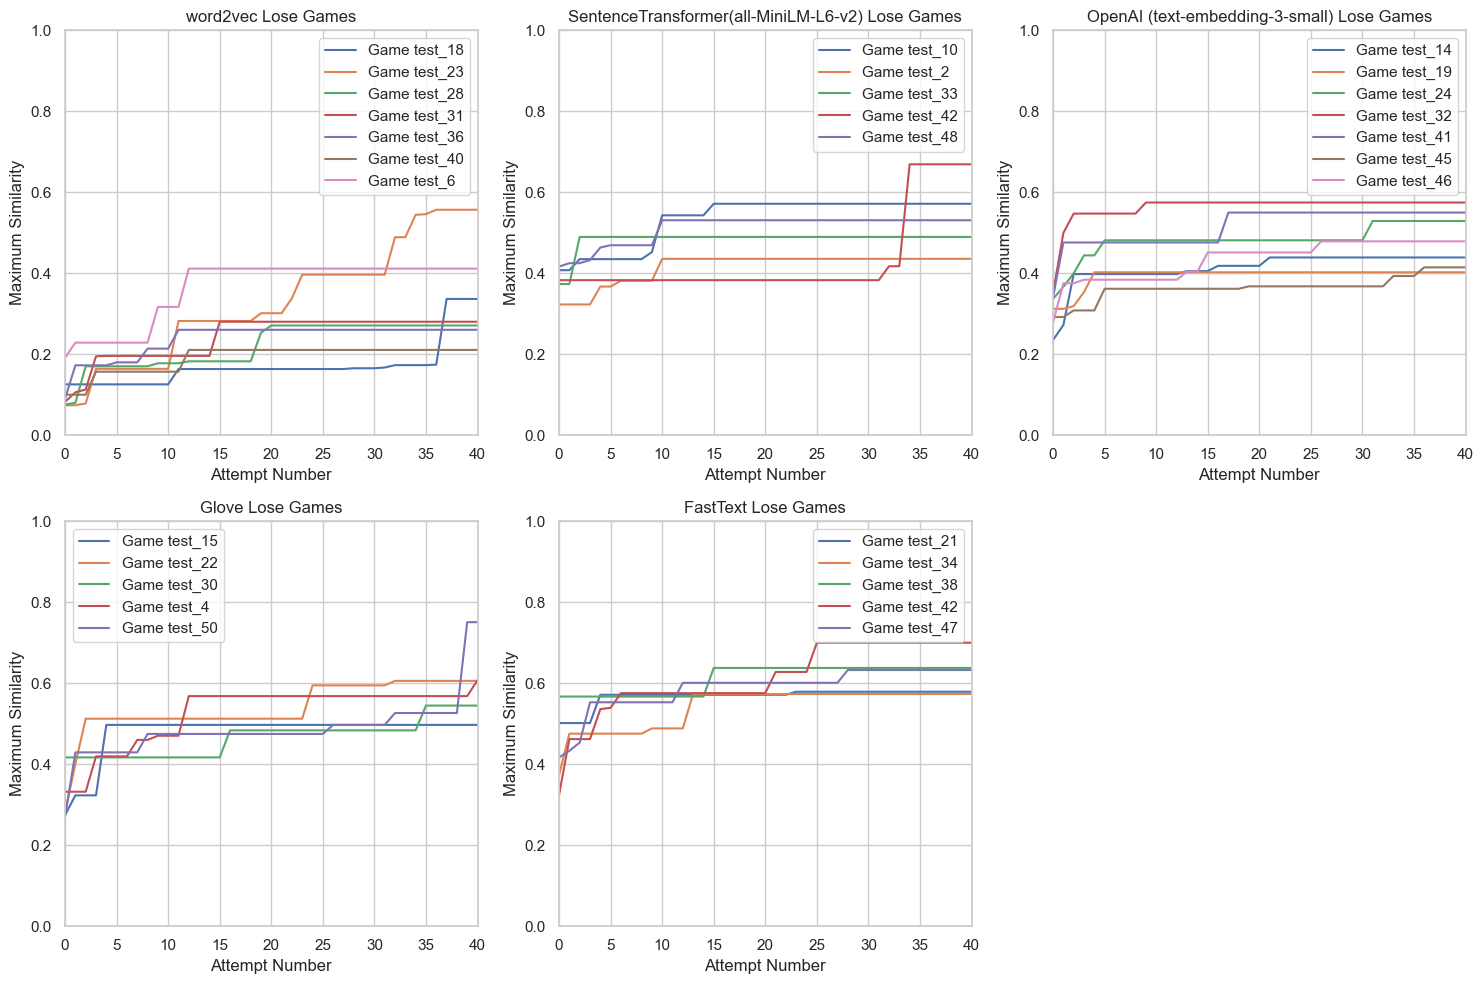

In [88]:
import matplotlib.pyplot as plt

unique_models = data['model'].unique()
num_rows = 2
num_cols = 3

plt.figure(figsize=(15, 10))

for i, model in enumerate(unique_models, 1):
    model_data = data[data['model'] == model]
    games = model_data.groupby('test_number')
    win_games = games.filter(lambda x: not any(x['win']))
    plt.subplot(num_rows, num_cols, i)
    
    for name, group in win_games.groupby('test_number'):
        group['max_similarity'] = group['similarity'].cummax()
        plt.plot(group['attempt_number'], group['max_similarity'], label=f'Game {name}')
    
    plt.xlim(0, 40)
    plt.ylim(0, 1)
    plt.xlabel('Attempt Number')
    plt.ylabel('Maximum Similarity')
    plt.title(f'{model} Lose Games')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
```

### Для всех

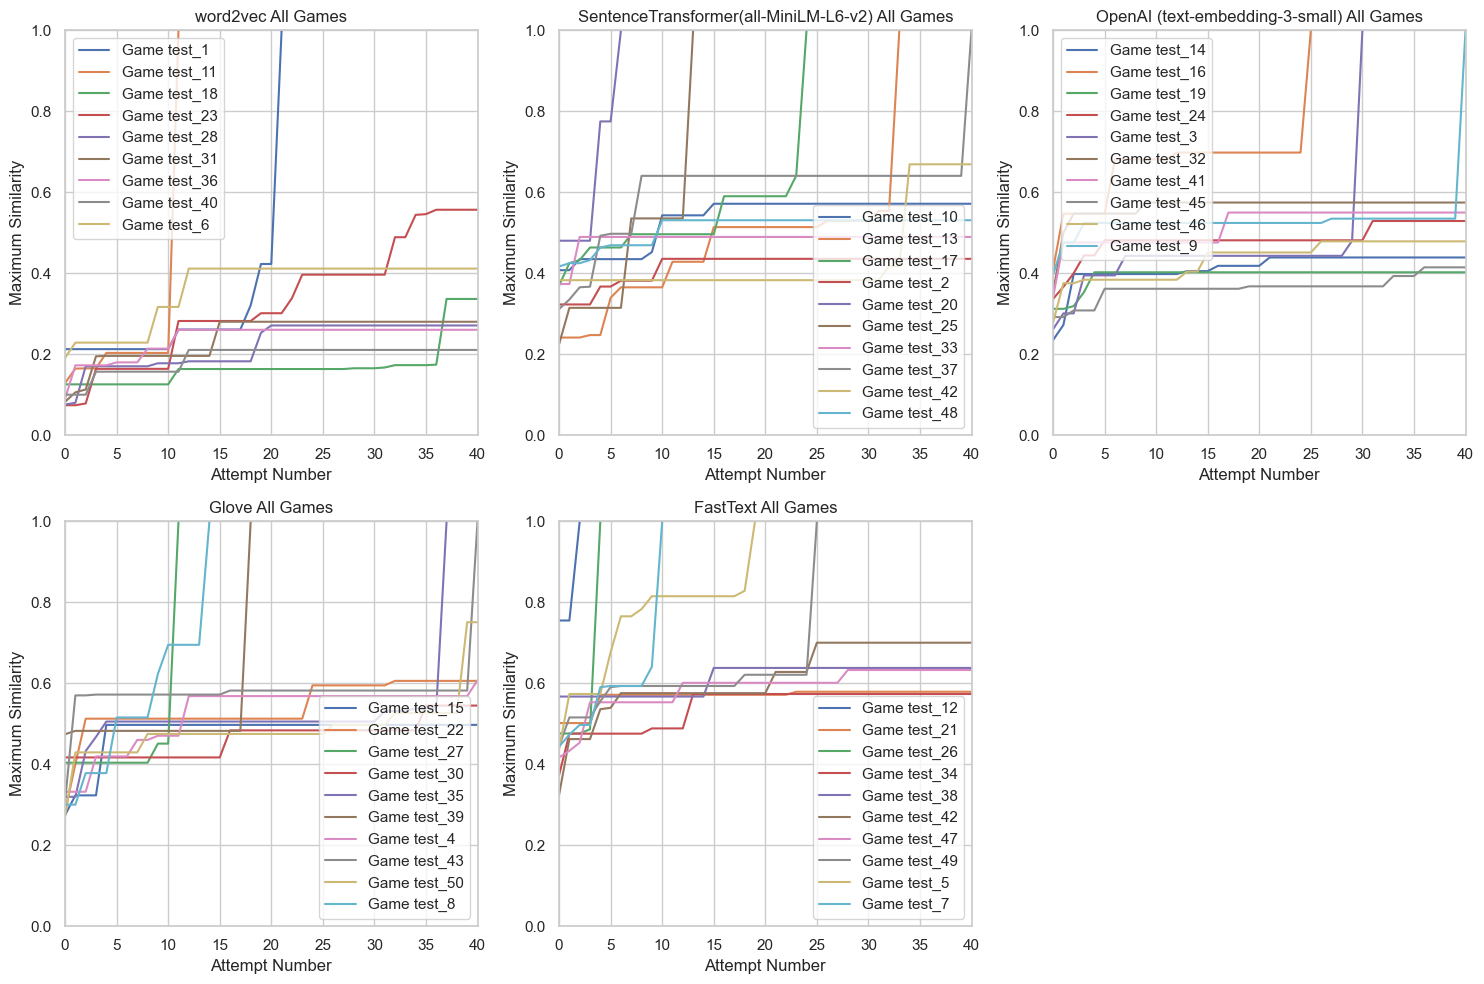

In [89]:
import matplotlib.pyplot as plt

unique_models = data['model'].unique()
num_rows = 2
num_cols = 3

plt.figure(figsize=(15, 10))

for i, model in enumerate(unique_models, 1):
    model_data = data[data['model'] == model]
    games = model_data.groupby('test_number')
    plt.subplot(num_rows, num_cols, i)
    
    for name, group in games:
        group['max_similarity'] = group['similarity'].cummax()
        plt.plot(group['attempt_number'], group['max_similarity'], label=f'Game {name}')
    
    plt.xlim(0, 40)
    plt.ylim(0, 1)
    plt.xlabel('Attempt Number')
    plt.ylabel('Maximum Similarity')
    plt.title(f'{model} All Games')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Усредненное

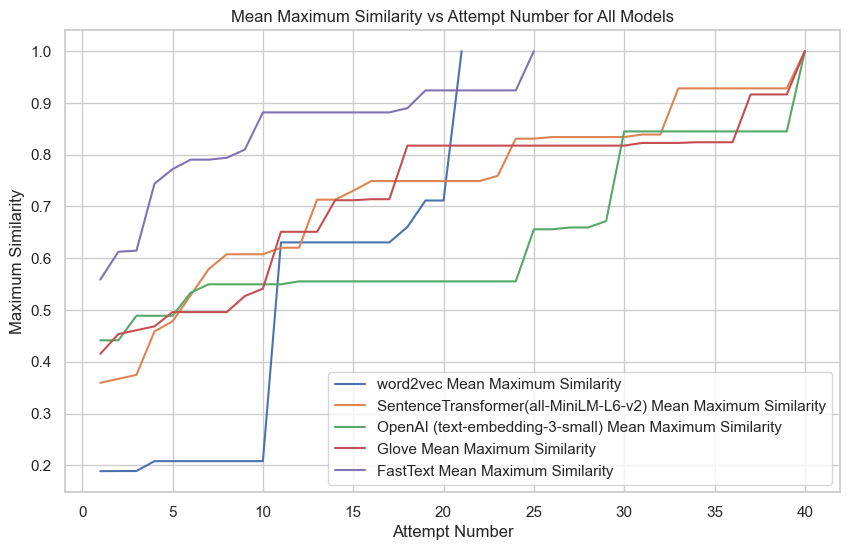

In [90]:
import matplotlib.pyplot as plt
import numpy as np

unique_models = data['model'].unique()
plt.figure(figsize=(10, 6))
max_similarity_values_all_models = {}

for model in unique_models:
    word2vec_data = data[data['model'] == model]
    games = word2vec_data.groupby('test_number')
    win_games = games.filter(lambda x: any(x['win']))
    max_similarity_values = {}
    max_attempts = win_games['attempt_number'].max()

    for name, group in win_games.groupby('test_number'):
        group['max_similarity'] = group['similarity'].cummax()
        filled_array = group.set_index('attempt_number').reset_index(drop=True)['max_similarity'].reindex(range(1, max_attempts + 1)).fillna(method='ffill')
        max_similarity_values[name] = filled_array.values

    mean_max_similarity = np.mean([max_similarity_values[key] for key in max_similarity_values], axis=0)
    max_similarity_values_all_models[model] = mean_max_similarity
    plt.plot(range(1, max_attempts + 1), mean_max_similarity, label=f'{model} Mean Maximum Similarity')

plt.xlabel('Attempt Number')
plt.ylabel('Maximum Similarity')
plt.title('Mean Maximum Similarity vs Attempt Number for All Models')
plt.legend()
plt.grid(True)
plt.show()

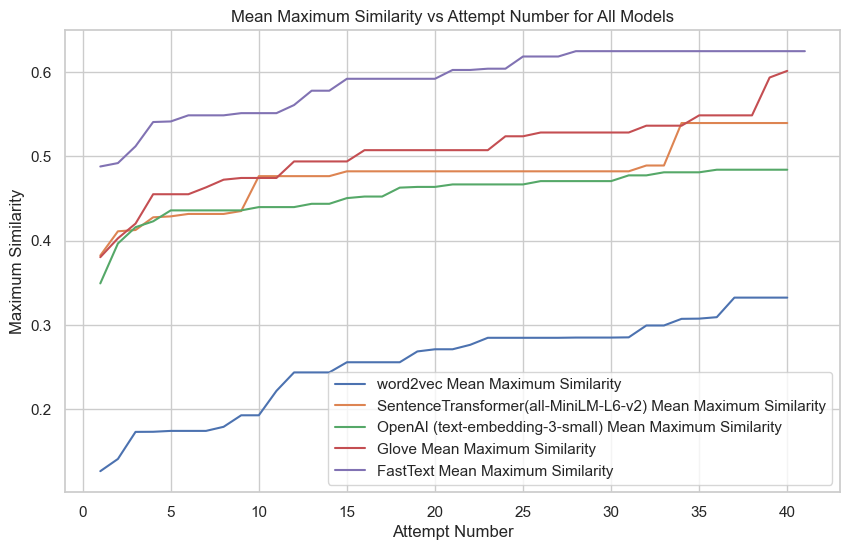

In [91]:
import matplotlib.pyplot as plt
import numpy as np

unique_models = data['model'].unique()
plt.figure(figsize=(10, 6))
max_similarity_values_all_models = {}

for model in unique_models:
    word2vec_data = data[data['model'] == model]
    games = word2vec_data.groupby('test_number')
    win_games = games.filter(lambda x: not any(x['win']))
    max_similarity_values = {}
    max_attempts = win_games['attempt_number'].max()

    for name, group in win_games.groupby('test_number'):
        group['max_similarity'] = group['similarity'].cummax()
        filled_array = group.set_index('attempt_number').reset_index(drop=True)['max_similarity'].reindex(range(1, max_attempts + 1)).fillna(method='ffill')
        max_similarity_values[name] = filled_array.values

    mean_max_similarity = np.mean([max_similarity_values[key] for key in max_similarity_values], axis=0)
    max_similarity_values_all_models[model] = mean_max_similarity
    plt.plot(range(1, max_attempts + 1), mean_max_similarity, label=f'{model} Mean Maximum Similarity')

plt.xlabel('Attempt Number')
plt.ylabel('Maximum Similarity')
plt.title('Mean Maximum Similarity vs Attempt Number for All Models')
plt.legend()
plt.grid(True)
plt.show()